In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('customer_churn.CSV')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# df.drop('customerID',axis='columns',inplace=True)
df.dtypes
df.shape

(7043, 21)

MonthlyCharges is float but TotalCharges is an OBJECT

In [4]:
#pd.to_numeric(df.TotalCharges) 
#gives errors due to spaces " 24.5","48.9 ",etc
pd.to_numeric(df.TotalCharges,errors='coerce')
# data with spaces are replaced with null
df.TotalCharges.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [5]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.shape

(7043, 21)

In [8]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 21)

In [9]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [11]:
df1.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [12]:
df1.TotalCharges.dtypes

dtype('float64')

Conversion completed

Text(0.5, 1.0, 'Customer Churn Histogram')

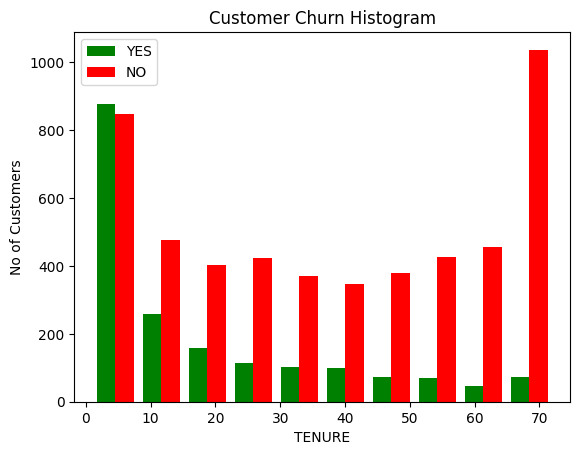

In [13]:
#histogram of tenure of customer not leaving
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['YES','NO'])
plt.legend()
plt.xlabel('TENURE')
plt.ylabel('No of Customers')
plt.title("Customer Churn Histogram")

Text(0.5, 1.0, 'Customer Churn Histogram')

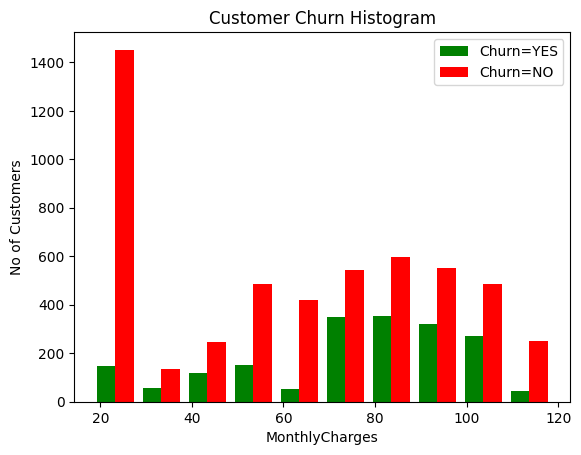

In [14]:
#histogram of MonthlyCharges of customer not leaving
MonthlyCharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no],color=['green','red'],label=['Churn=YES','Churn=NO'])
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('No of Customers')
plt.title("Customer Churn Histogram")

In [15]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}::{df[column].unique()}')

In [16]:
print_unique_col_values(df1)

customerID::['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender::['Female' 'Male']
Partner::['Yes' 'No']
Dependents::['No' 'Yes']
PhoneService::['No' 'Yes']
MultipleLines::['No phone service' 'No' 'Yes']
InternetService::['DSL' 'Fiber optic' 'No']
OnlineSecurity::['No' 'Yes' 'No internet service']
OnlineBackup::['Yes' 'No' 'No internet service']
DeviceProtection::['No' 'Yes' 'No internet service']
TechSupport::['No' 'Yes' 'No internet service']
StreamingTV::['No' 'Yes' 'No internet service']
StreamingMovies::['No' 'Yes' 'No internet service']
Contract::['Month-to-month' 'One year' 'Two year']
PaperlessBilling::['Yes' 'No']
PaymentMethod::['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn::['No' 'Yes']


In [17]:
#replacing (No internet service---> No) and (No phone service--->No) in all columns
df1.replace('No phone service','No',inplace=True)
df1.replace('No internet service','No',inplace=True)
print_unique_col_values(df1)

customerID::['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender::['Female' 'Male']
Partner::['Yes' 'No']
Dependents::['No' 'Yes']
PhoneService::['No' 'Yes']
MultipleLines::['No' 'Yes']
InternetService::['DSL' 'Fiber optic' 'No']
OnlineSecurity::['No' 'Yes']
OnlineBackup::['Yes' 'No']
DeviceProtection::['No' 'Yes']
TechSupport::['No' 'Yes']
StreamingTV::['No' 'Yes']
StreamingMovies::['No' 'Yes']
Contract::['Month-to-month' 'One year' 'Two year']
PaperlessBilling::['Yes' 'No']
PaymentMethod::['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn::['No' 'Yes']


In [18]:
#convert Yes and No to 1 & 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({"Yes":1,'No':0},inplace=True)

In [19]:
print_unique_col_values(df1)

customerID::['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender::['Female' 'Male']
InternetService::['DSL' 'Fiber optic' 'No']
Contract::['Month-to-month' 'One year' 'Two year']
PaymentMethod::['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [20]:
df1['gender'].replace({'Male':1,"Female":0},inplace=True)
print_unique_col_values(df1)

customerID::['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
InternetService::['DSL' 'Fiber optic' 'No']
Contract::['Month-to-month' 'One year' 'Two year']
PaymentMethod::['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


ONE HOT ENCODING

In [21]:
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

SCALING THE INPUTS FOR DL MODEL BETWEEN 1 TO 0

In [23]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale]= scaler.fit_transform(df2[cols_to_scale])

In [24]:
for col in df2:
    print(f'{col}::{df2[col].unique()}')

customerID::['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender::[0 1]
SeniorCitizen::[0 1]
Partner::[1 0]
Dependents::[0 1]
tenure::[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService::[0 1]
Mult

TRAIN TEST SPLIT

In [31]:
x = df2.drop(['customerID','Churn'],axis='columns')
y = df2.Churn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
x_train.shape,y_train.shape

((5625, 26), (5625,))

In [32]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,0,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,1,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,0,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,1,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,0,0,1,1,0.985915,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
1730,1,0,0,0,0.000000,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4086,0,0,1,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
2259,0,0,0,0,0.098592,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


ANN MODEL

In [33]:
model = keras.Sequential([
    keras.Input(shape=(26,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 1ms/step - loss: 0.5096 - accuracy: 0.7399
Epoch 2/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7916
Epoch 3/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8023
Epoch 4/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8021
Epoch 5/5
176/176 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8044


In [34]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4409 - accuracy: 0.7910


[0.4408905506134033, 0.7910447716712952]

In [35]:
y_predicted = model.predict(x_test)
y_pred = []
for element in y_predicted:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred[:10]

44/44 [==============================] - 0s 896us/step


[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [36]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       999
           1       0.66      0.59      0.62       408

    accuracy                           0.79      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.79      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

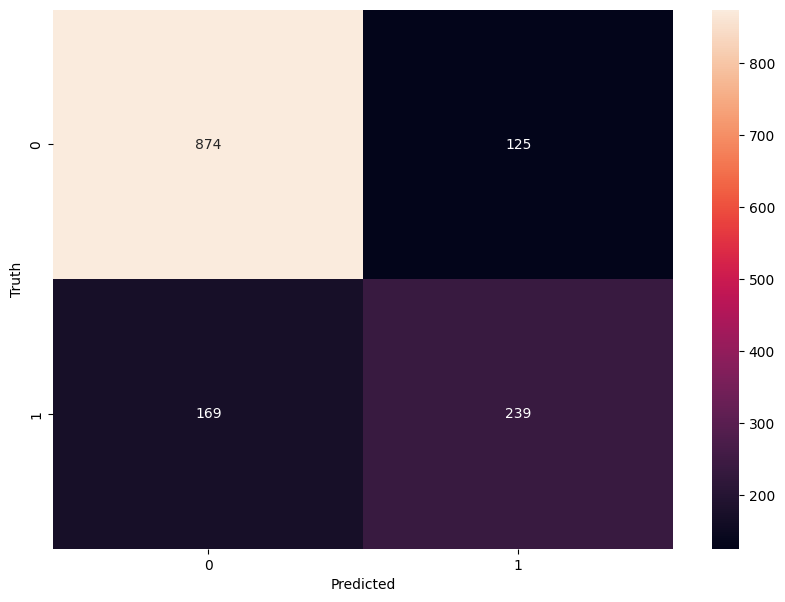

In [38]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [39]:
#accuracy
round((887+213)/(887+213+112+195),2) 

0.78

In [40]:
#Precision for class 0: did not churn
round((887)/(887+195),2)

0.82

In [41]:
#Precision for class 1: churn
round((213)/(112+213),2)

0.66

In [42]:
#recall for class 0
round((887)/(112+887),2)

0.89

In [43]:
#recall for class 1
round((213)/(195+213),2)

0.52